In [1]:
import pandas as pd

In [4]:
df = pd.read_csv(r"E:\APythonSoftware_2025\KaggelMachineLearning\Finished\DATASETS\Classification\Rain_prediction\Rainfall.csv")

In [5]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   day  pressure   maxtemp  temparature  mintemp  dewpoint  humidity   cloud   \
0    1     1025.9     19.9         18.3     16.8      13.1         72      49   
1    2     1022.0     21.7         18.9     17.2      15.6         81      83   
2    3     1019.7     20.3         19.3     18.0      18.4         95      91   
3    4     1018.9     22.3         20.6     19.1      18.8         90      88   
4    5     1015.9     21.3         20.7     20.2      19.9         95      81   

  rainfall  sunshine           winddirection  windspeed  
0      yes       9.3                    80.0       26.3  
1      yes       0.6                    50.0       15.3  
2      yes       0.0                    40.0       14.2  
3      yes       1.0                    50.0       16.9  
4      yes       0.0                    40.0       13.7  


In [6]:
# Check data types
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
day                         int64
pressure                  float64
maxtemp                   float64
temparature               float64
mintemp                   float64
dewpoint                  float64
humidity                    int64
cloud                       int64
rainfall                   object
sunshine                  float64
         winddirection    float64
windspeed                 float64
dtype: object


In [7]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64


In [ ]:
""" 
Step 2: Data Preprocessing¶
Handle missing values.

Encode categorical variables if any.

Scale numerical features if needed.
"""

In [8]:
# Rename columns to remove unwanted spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

# Encode the target variable: 'rainfall' (Yes → 1, No → 0)
df['rainfall'] = df['rainfall'].map({'yes': 1, 'no': 0})

# Handle missing values by filling with median
df['winddirection'].fillna(df['winddirection'].median(), inplace=True)
df['windspeed'].fillna(df['windspeed'].median(), inplace=True)

# Verify changes
print("Updated dataset info:")
print(df.info())
print("\nUnique values in 'rainfall':", df['rainfall'].unique())
print("\nMissing values after preprocessing:\n", df.isnull().sum())

Updated dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    int64  
 9   sunshine       366 non-null    float64
 10  winddirection  366 non-null    float64
 11  windspeed      366 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 34.4 KB
None

Unique values in 'rainfall': [1 0]

Missing values after preprocessing:
 day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity     

C:\Users\91887\AppData\Local\Temp\ipykernel_23468\1950066376.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['winddirection'].fillna(df['winddirection'].median(), inplace=True)
C:\Users\91887\AppData\Local\Temp\ipykernel_23468\1950066376.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [ ]:
""" 
Step 3: Exploratory Data Analysis (EDA)
Summary statistics (df.describe())

Check feature distributions (sns.histplot())

Correlation heatmap (sns.heatmap())
"""

C:\Users\91887\AppData\Local\Temp\ipykernel_23468\277578050.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['rainfall'], palette='coolwarm')


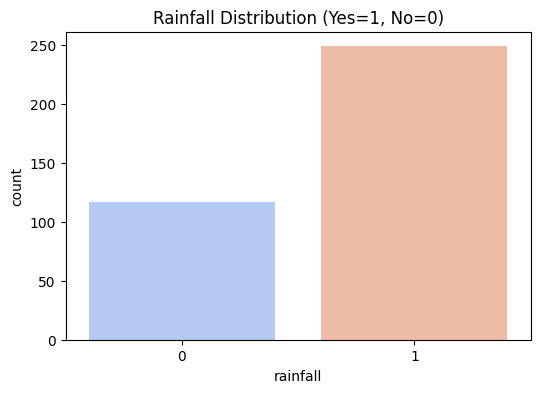

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['rainfall'], palette='coolwarm')
plt.title("Rainfall Distribution (Yes=1, No=0)")
plt.show()

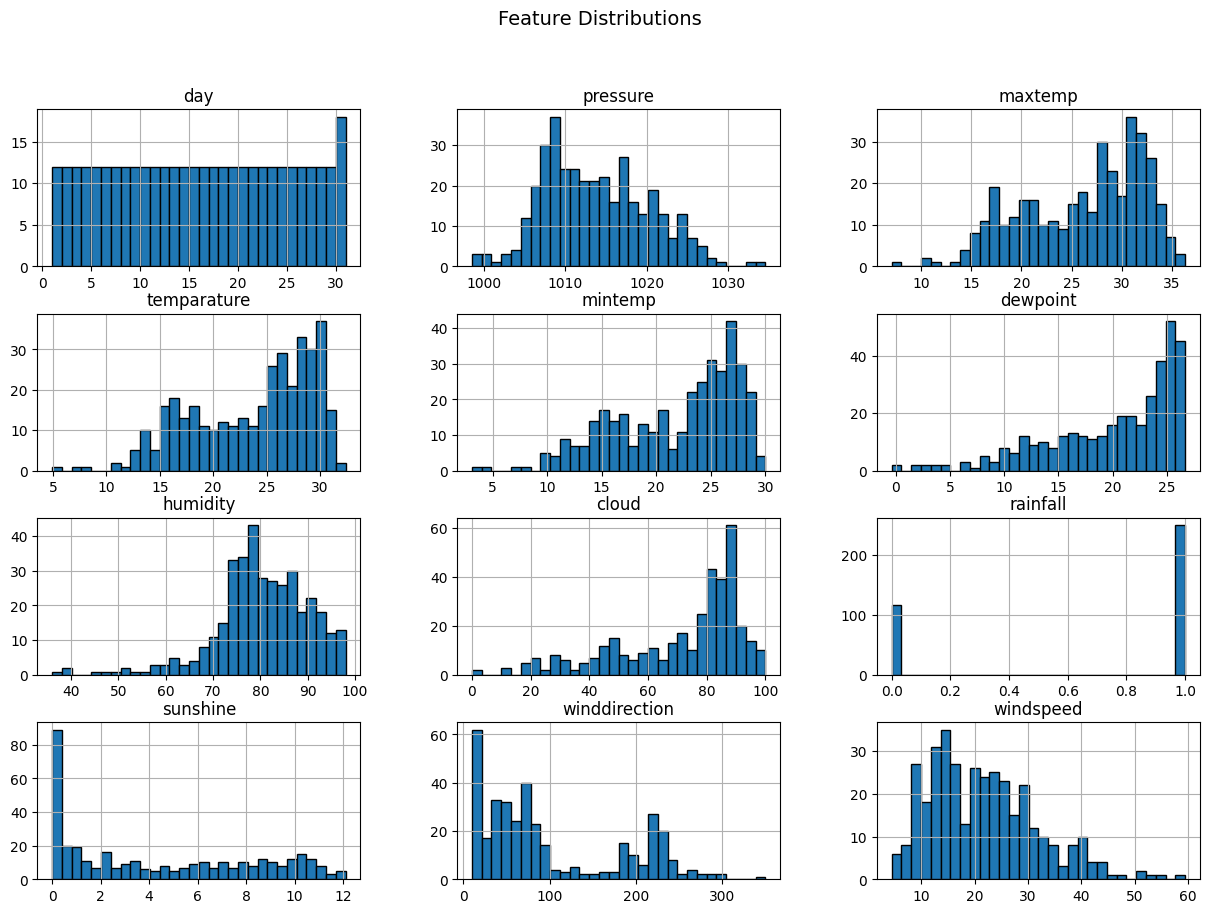

In [10]:
# 2. Feature distributions
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

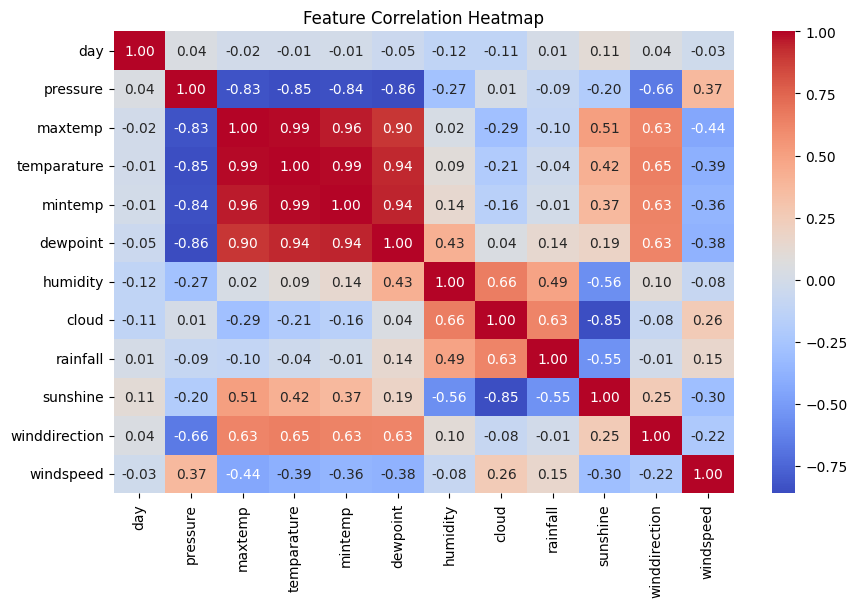

In [11]:
# 3. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\91887\AppData\Local\Temp\ipykernel_23468\1113588230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rainfall', y='temparature', data=df, palette='coolwarm')


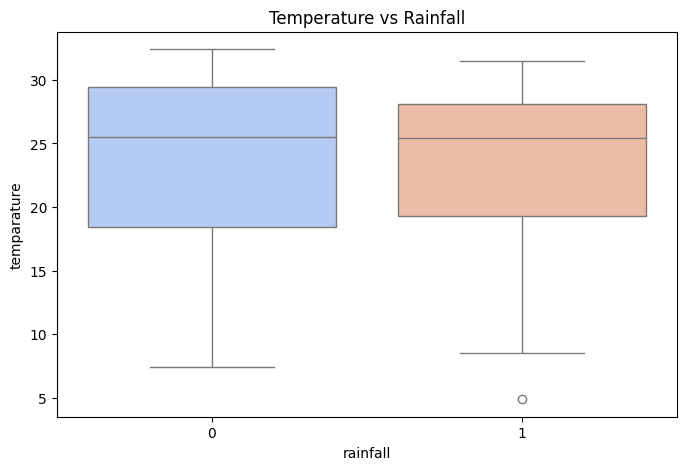

In [12]:
# 4. Relationship between Temperature and Rainfall
plt.figure(figsize=(8, 5))
sns.boxplot(x='rainfall', y='temparature', data=df, palette='coolwarm')
plt.title("Temperature vs Rainfall")
plt.show()

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop highly correlated features
df = df.drop(columns=['maxtemp', 'mintemp'])  # Keeping 'temperature' instead

# Handling missing values (if any)
df = df.dropna()

# Splitting features and target variable
X = df.drop(columns=['rainfall'])  # Assuming 'rainfall' is the target
y = df['rainfall']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training - Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7567567567567568
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.48      0.55        23
           1       0.79      0.88      0.83        51

    accuracy                           0.76        74
   macro avg       0.72      0.68      0.69        74
weighted avg       0.75      0.76      0.75        74



In [14]:
!pip install imblearn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

# Compute class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight=class_weight_dict), 
                           param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test_scaled)

# Model Evaluation
print("Optimized Accuracy:", accuracy_score(y_test, y_pred))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Optimized Accuracy: 0.7297297297297297
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.52      0.55        23
           1       0.79      0.82      0.81        51

    accuracy                           0.73        74
   macro avg       0.68      0.67      0.68        74
weighted avg       0.72      0.73      0.73        74



In [ ]:
""" 
Since accuracy dropped after applying SMOTE + Hyperparameter Tuning, let's take a different approach:

1️⃣ Try a Different Resampling Technique: Use ADASYN (Adaptive Synthetic Sampling) instead of SMOTE, which focuses on harder-to-classify points.
2️⃣ Use Different Models: Try XGBoost or Logistic Regression to compare results.
3️⃣ Feature Selection: Remove highly correlated features (from the heatmap) to reduce overfitting.
4️⃣ Use Threshold Tuning: Instead of using 0.5 as a threshold, adjust it based on ROC Curve analysis.*

"""

In [25]:
from imblearn.over_sampling import ADASYN

In [27]:
# Check shapes before resampling
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_encoded shape:", y_train.shape)

# Ensure they have the same number of samples
if X_train_scaled.shape[0] != len(y_train):
    print("Mismatch detected! Fixing...")

    # Align sizes (e.g., by truncating `y_train_encoded` or fixing preprocessing)
    min_samples = min(X_train_scaled.shape[0], len(y_train))
    X_train_scaled = X_train_scaled[:min_samples]
    y_train_encoded = y_train[:min_samples]

# Apply ADASYN to balance the dataset
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Confirm new shapes
print("New X_train_resampled shape:", X_train_resampled.shape)
print("New y_train_resampled shape:", y_train_resampled.shape)

X_train_scaled shape: (292, 9)
y_train_encoded shape: (292,)
New X_train_resampled shape: (408, 9)
New y_train_resampled shape: (408,)


In [29]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 2.4 MB/s eta 0:01:02
   ---------------------------------------- 1.3/150.0 MB 2.5 MB/s eta 0:01:00
    --------------------------------------- 2.1/150.0 MB 2.7 MB/s eta 0:00:56
    --------------------------------------- 2.9/150.0 MB 2.9 MB/s eta 0:00:51
    --------------------------------------- 3.7/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 4.5/150.0 MB 3.3 MB/s eta 0:00:45
   - -------------------------------------- 5.5/150.0 MB 3.5 MB/s eta 0:00:41
   - -------------------------------------- 6.3/150.0 MB 3.6 MB/s eta 0:00:41
   - -------------------------------------- 7.1/150.0 MB 3.6 MB/s eta 0:00:40
   -- ------------------------------------- 7.9/150.0 MB 3.6 MB/s eta 0:00:40
   -- ------------------------------------- 8.9/150.0 MB 3.7 MB/s eta 0:00:39



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

# Feature Selection using XGBoost's Feature Importance
feature_selector = SelectFromModel(XGBClassifier(random_state=42))
X_train_selected = feature_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = feature_selector.transform(X_test_scaled)

# Print the number of selected features
print("Number of selected features:", X_train_selected.shape[1])

Number of selected features: 2


In [33]:
import numpy as np

# If X_train was originally a DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)

# Get feature importances
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Print feature importances
feature_importances = xgb_model.feature_importances_
feature_names = X_train_resampled.columns  # Ensure feature names match your dataset

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

print("Feature Importances:")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]:.4f}")

Feature Importances:
cloud: 0.3461
dewpoint: 0.1220
humidity: 0.0997
temparature: 0.0948
winddirection: 0.0817
sunshine: 0.0688
pressure: 0.0683
day: 0.0681
windspeed: 0.0506


C:\Users\91887\AppData\Local\Temp\ipykernel_23468\3171343182.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


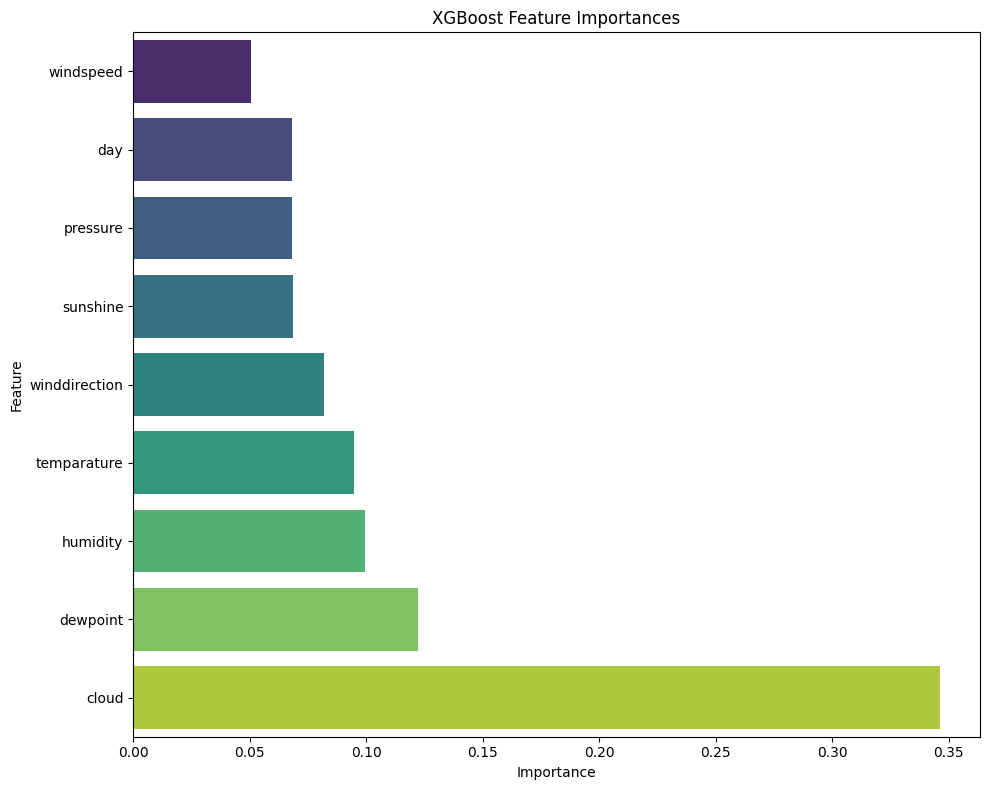

In [36]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)  # ascending for horizontal bar chart

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('XGBoost Feature Importances')
plt.tight_layout()
plt.show()
